# <center>Decision Trees Project

### Importing Libraries & Understanding Data

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn import tree,metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
import statsmodels.api as sm
%matplotlib inline

In [31]:
os.chdir("D:/Imarticus/Supervised Learning/Decision Tree/Heart Disease Prediction/Dataset")
df=pd.read_csv("D:/Imarticus/Supervised Learning/Decision Tree/Heart Disease Prediction/Dataset/HeartDisease.csv")

In [32]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [34]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
# Let's Check the missing data if any 
# Gives the list of columns which have only null values
df.columns[df.isnull().any()]

Index([], dtype='object')

## Visualising Data 

##### We will now examine how Cholestrol affecs in selective list?

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anacond

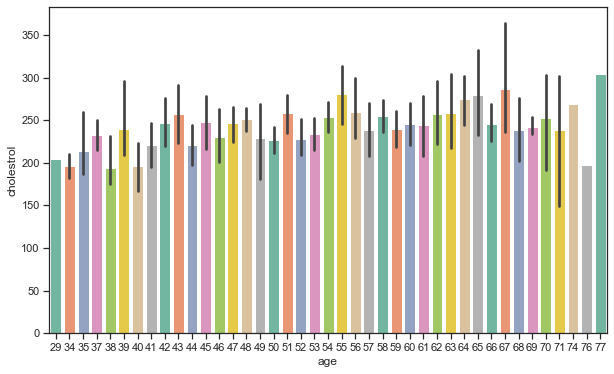

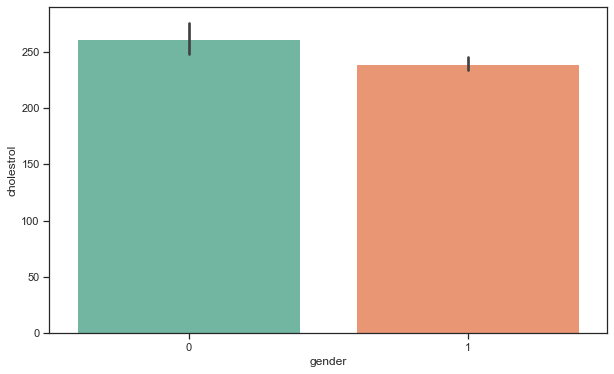

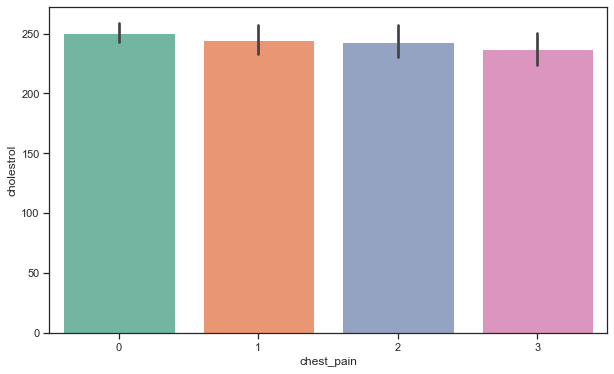

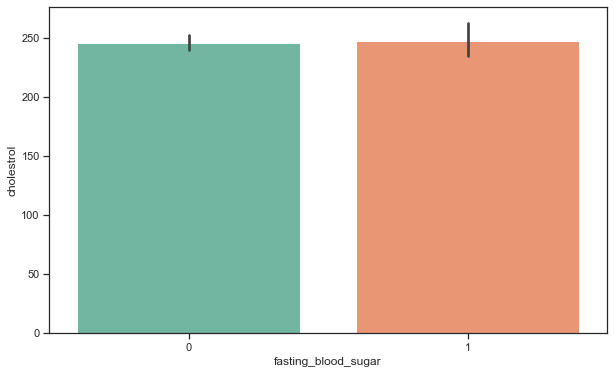

In [70]:
selective=df[['age', 'gender', 'chest_pain','fasting_blood_sugar']]
# This loop will help us to print all the graphs in one go..
for feature in selective:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'cholestrol', data=df, palette='Set2')

## Expolarity analysis 

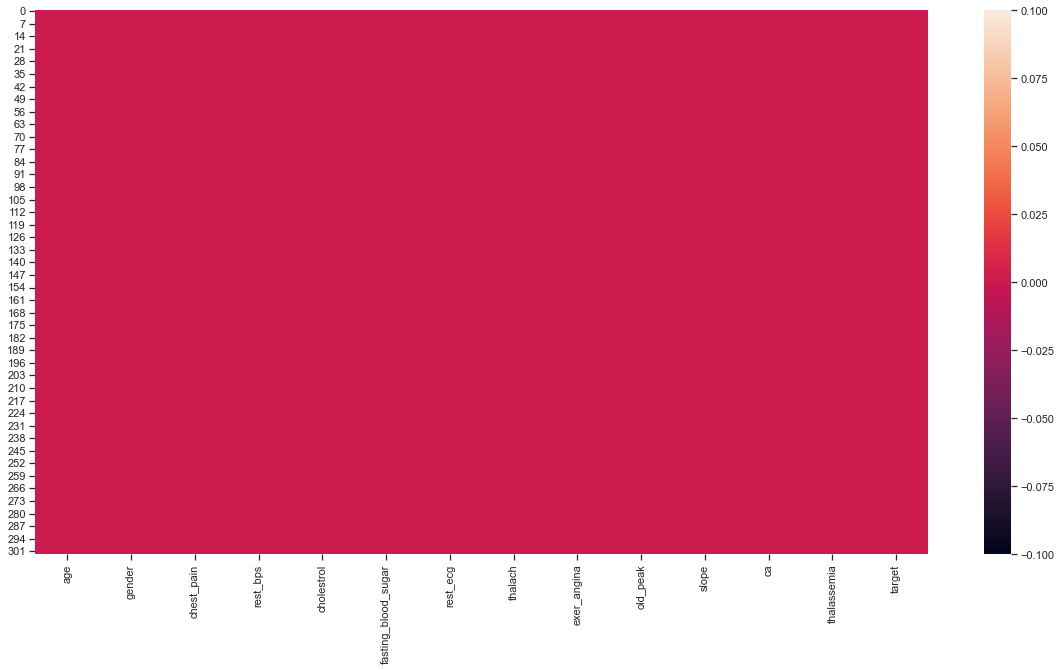

In [36]:
# plot of missing value attributes
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

<AxesSubplot:>

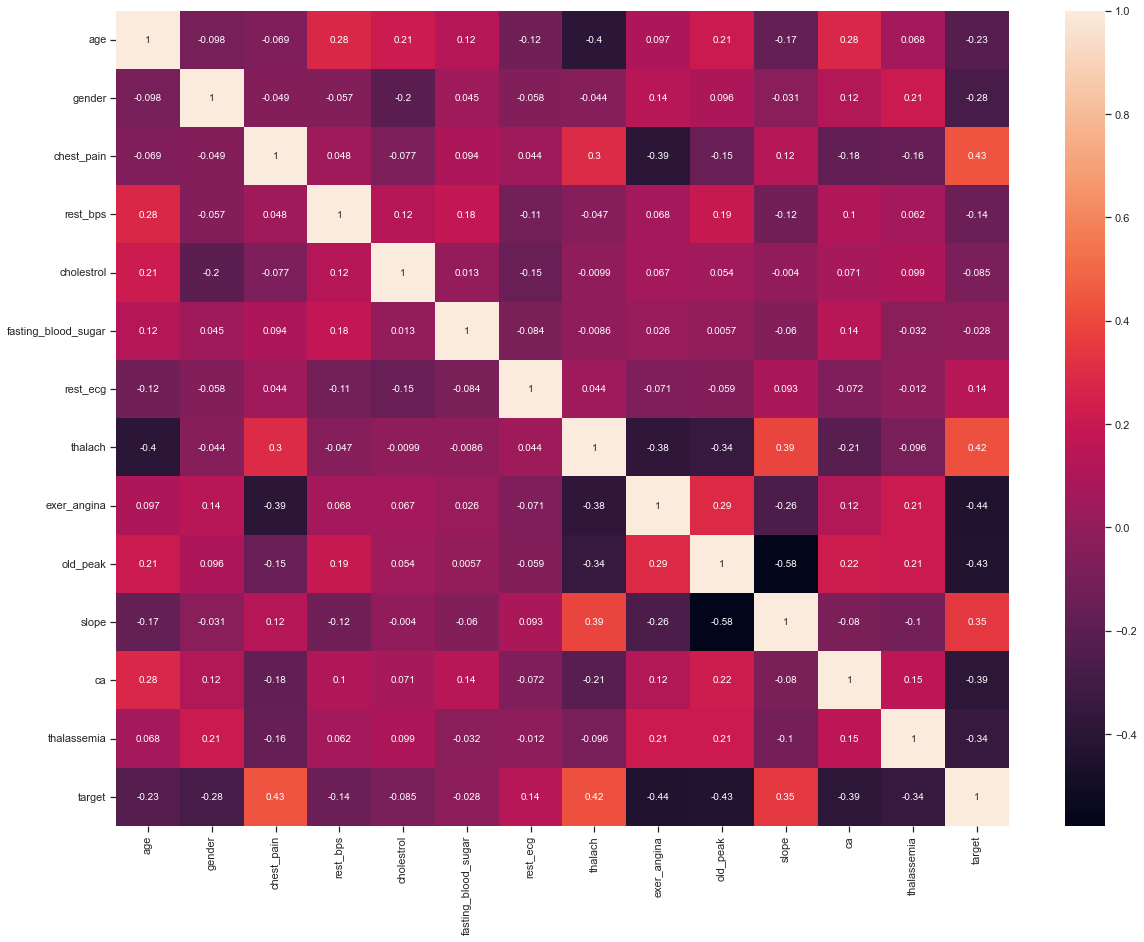

In [37]:
# Correlation Plot
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [38]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


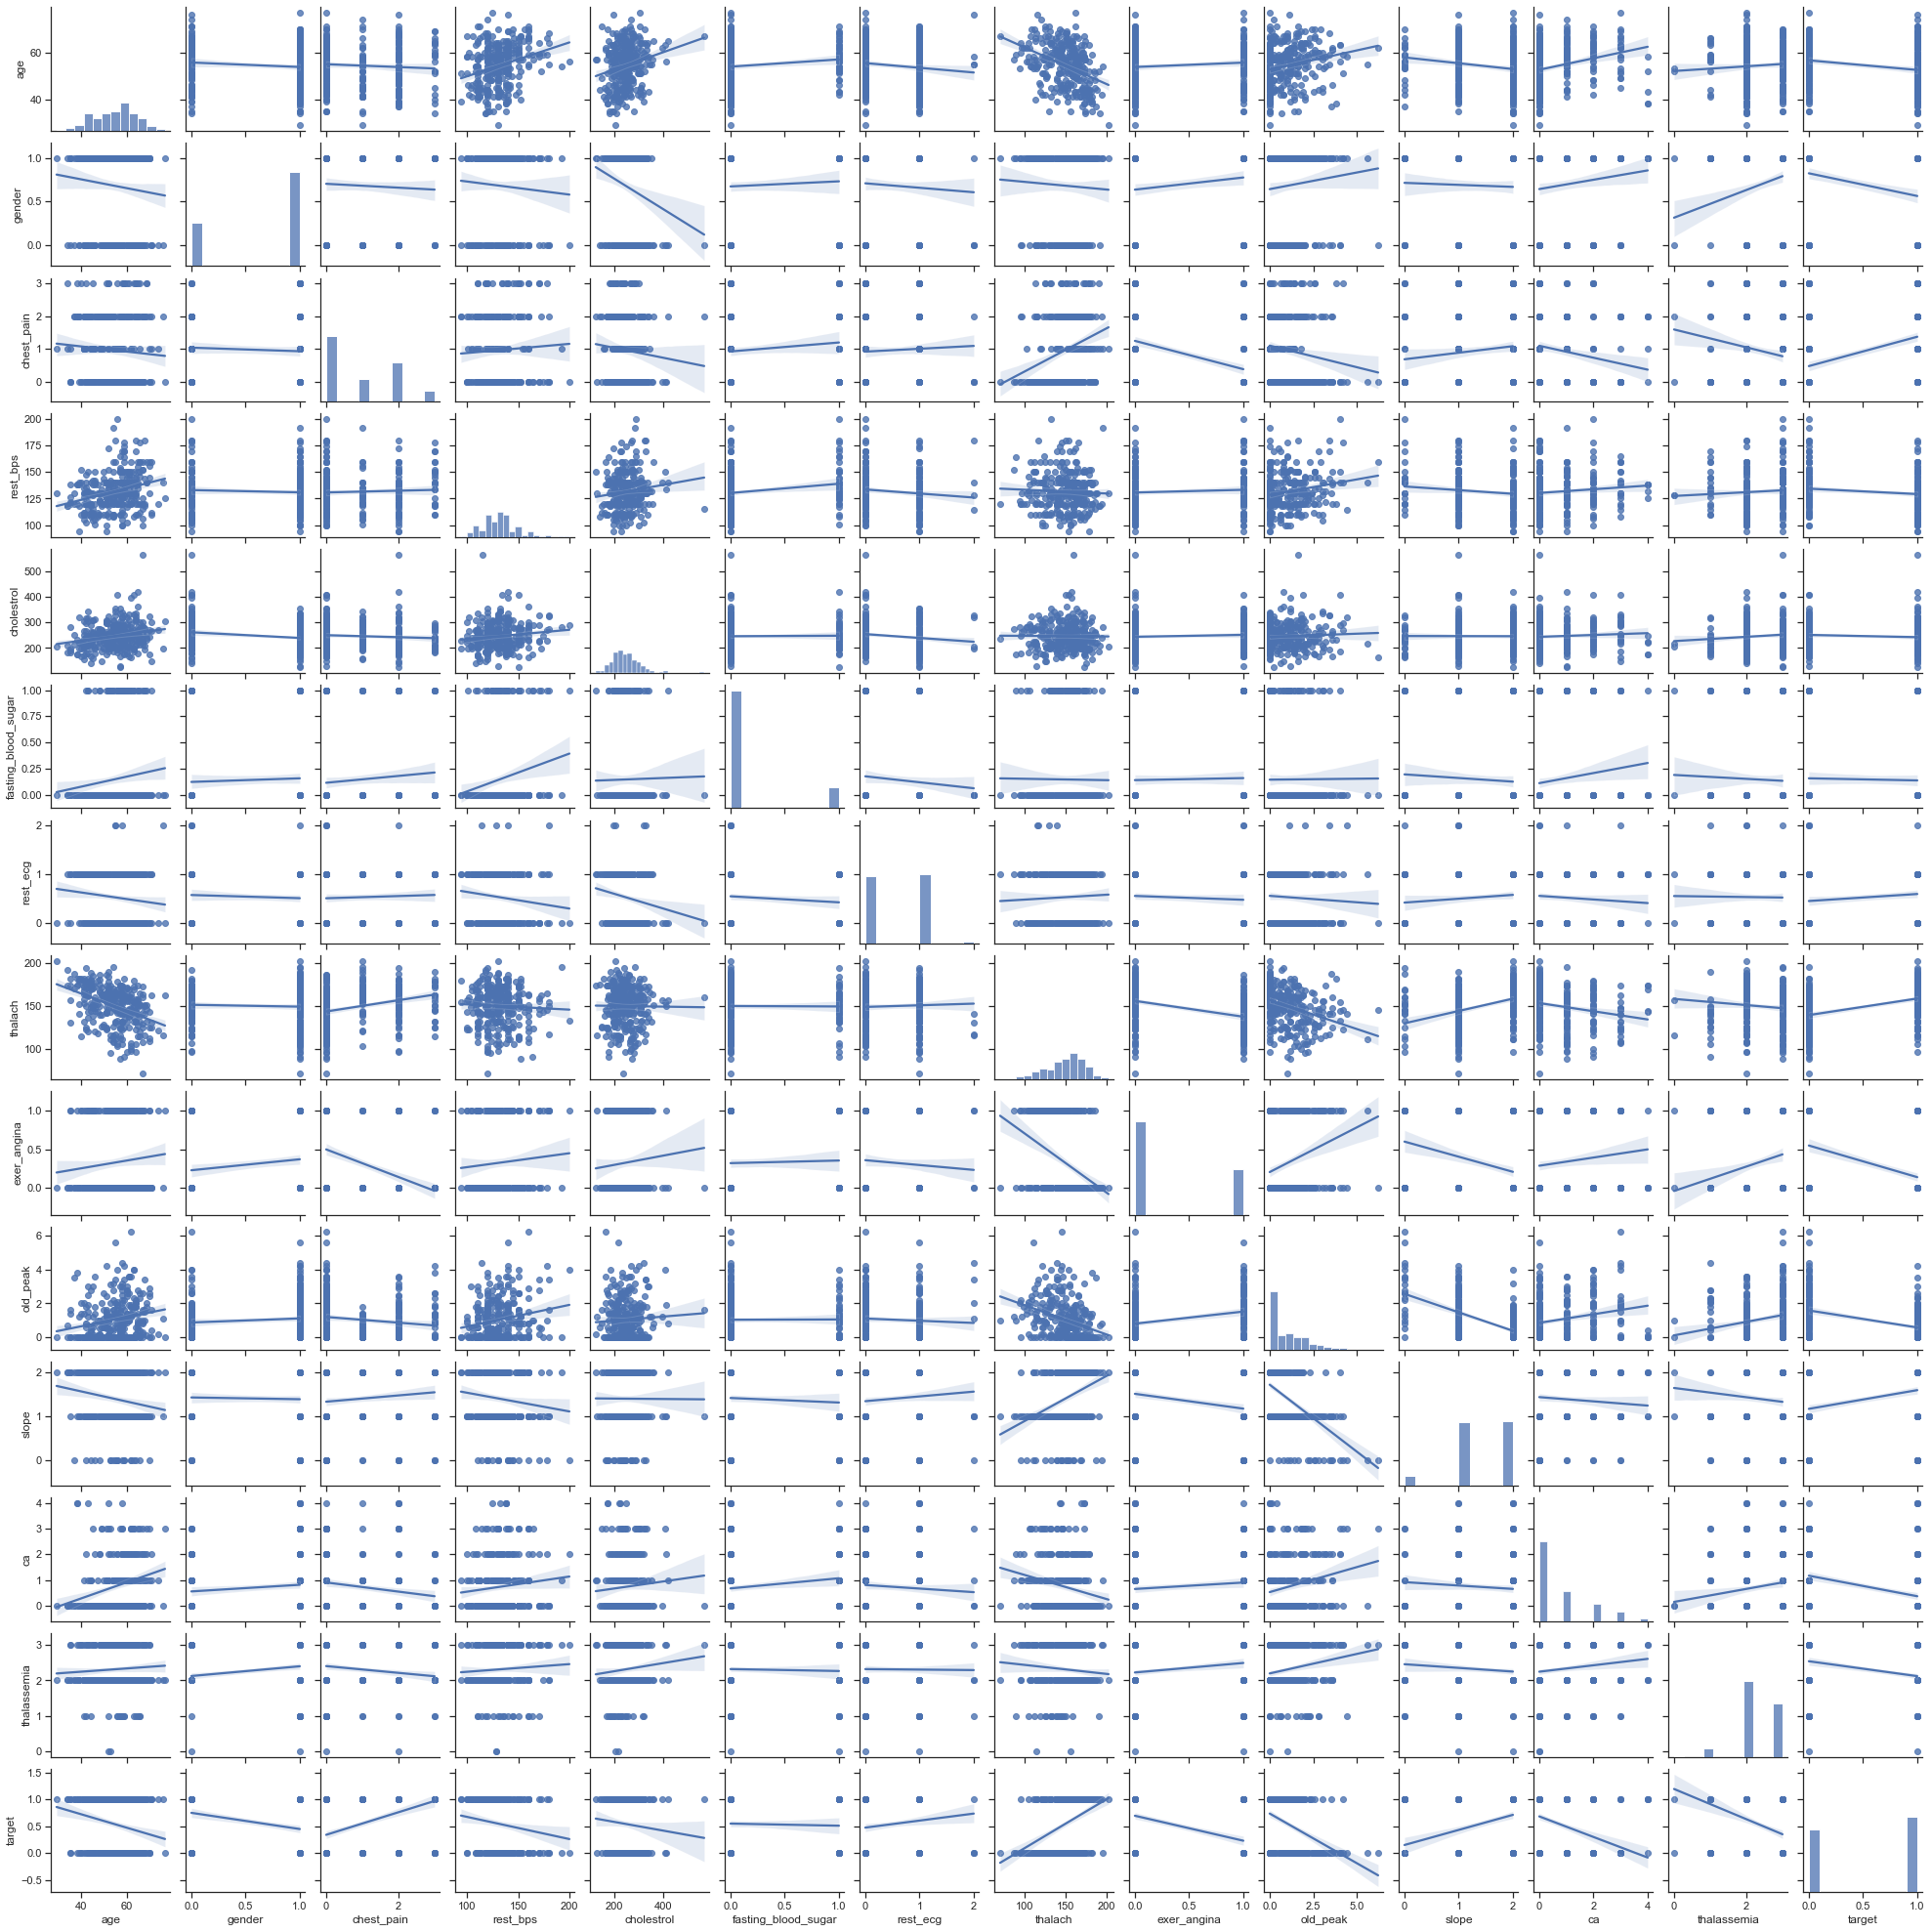

In [39]:
col=['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia','target']
sns.set(style='ticks')
sns.pairplot(df[col],size=2,kind='reg')

In [41]:
df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

### Assigning varibale to predict the split for homogenous 

In [42]:
df.loc[df['target']=='No','target']=0

In [43]:
df.loc[df['target']=='Yes','target']=1

In [44]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [45]:
train_y=df['target']

In [46]:
train_y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
train_x = df[['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia']]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=123)

## Logistic reduction

In [167]:
lr=LogisticRegression()

In [168]:
lr2=LogisticRegression(max_iter=1000)

In [169]:
# fit the model
lr.fit(x_train,y_train)

C:\Users\sasai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
# fit the model
lr2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [171]:
#making predictions using data
y_pred = lr.predict(x_test)
y_pred2=lr2.predict(x_test)

In [172]:
#getting model performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [173]:
confusion_matrix(y_test,y_pred)

array([[34, 11],
       [ 7, 39]], dtype=int64)

In [175]:
confusion_matrix(y_test,y_pred2)

array([[35, 10],
       [ 7, 39]], dtype=int64)

In [174]:
from sklearn.metrics import f1_score

In [189]:
print(f1_score(y_test,y_pred))
print(f1_score(y_test,y_pred2))

0.8125
0.8210526315789473


In [190]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))

0.8021978021978022
0.8131868131868132


In [191]:
print(precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred2))

0.78
0.7959183673469388


In [192]:
print(recall_score(y_test,y_pred))
print(recall_score(y_test,y_pred2))

0.8478260869565217
0.8478260869565217


In [193]:
print(roc_auc_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred2))

0.8016908212560386
0.8128019323671497


In [51]:
x_train[0:2]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2


In [52]:
y_train[0:2] 

170    0
132    1
Name: target, dtype: int64

In [53]:
dt=tree.DecisionTreeClassifier( random_state=123) # Create model object

In [54]:
y_train.isna().sum()

0

In [56]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [57]:
y_pred=dt.predict(x_test)

In [58]:
y_pred[0:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [59]:
y_pred=y_pred.astype(np.number)
y_test=y_test.astype(np.number)

<ipython-input-59-0ac18cfde687>:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  y_pred=y_pred.astype(np.number)


In [60]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

print('Precision',metrics.precision_score(y_test,y_pred))

print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.7802197802197802
Precision 0.7708333333333334
Recall 0.8043478260869565


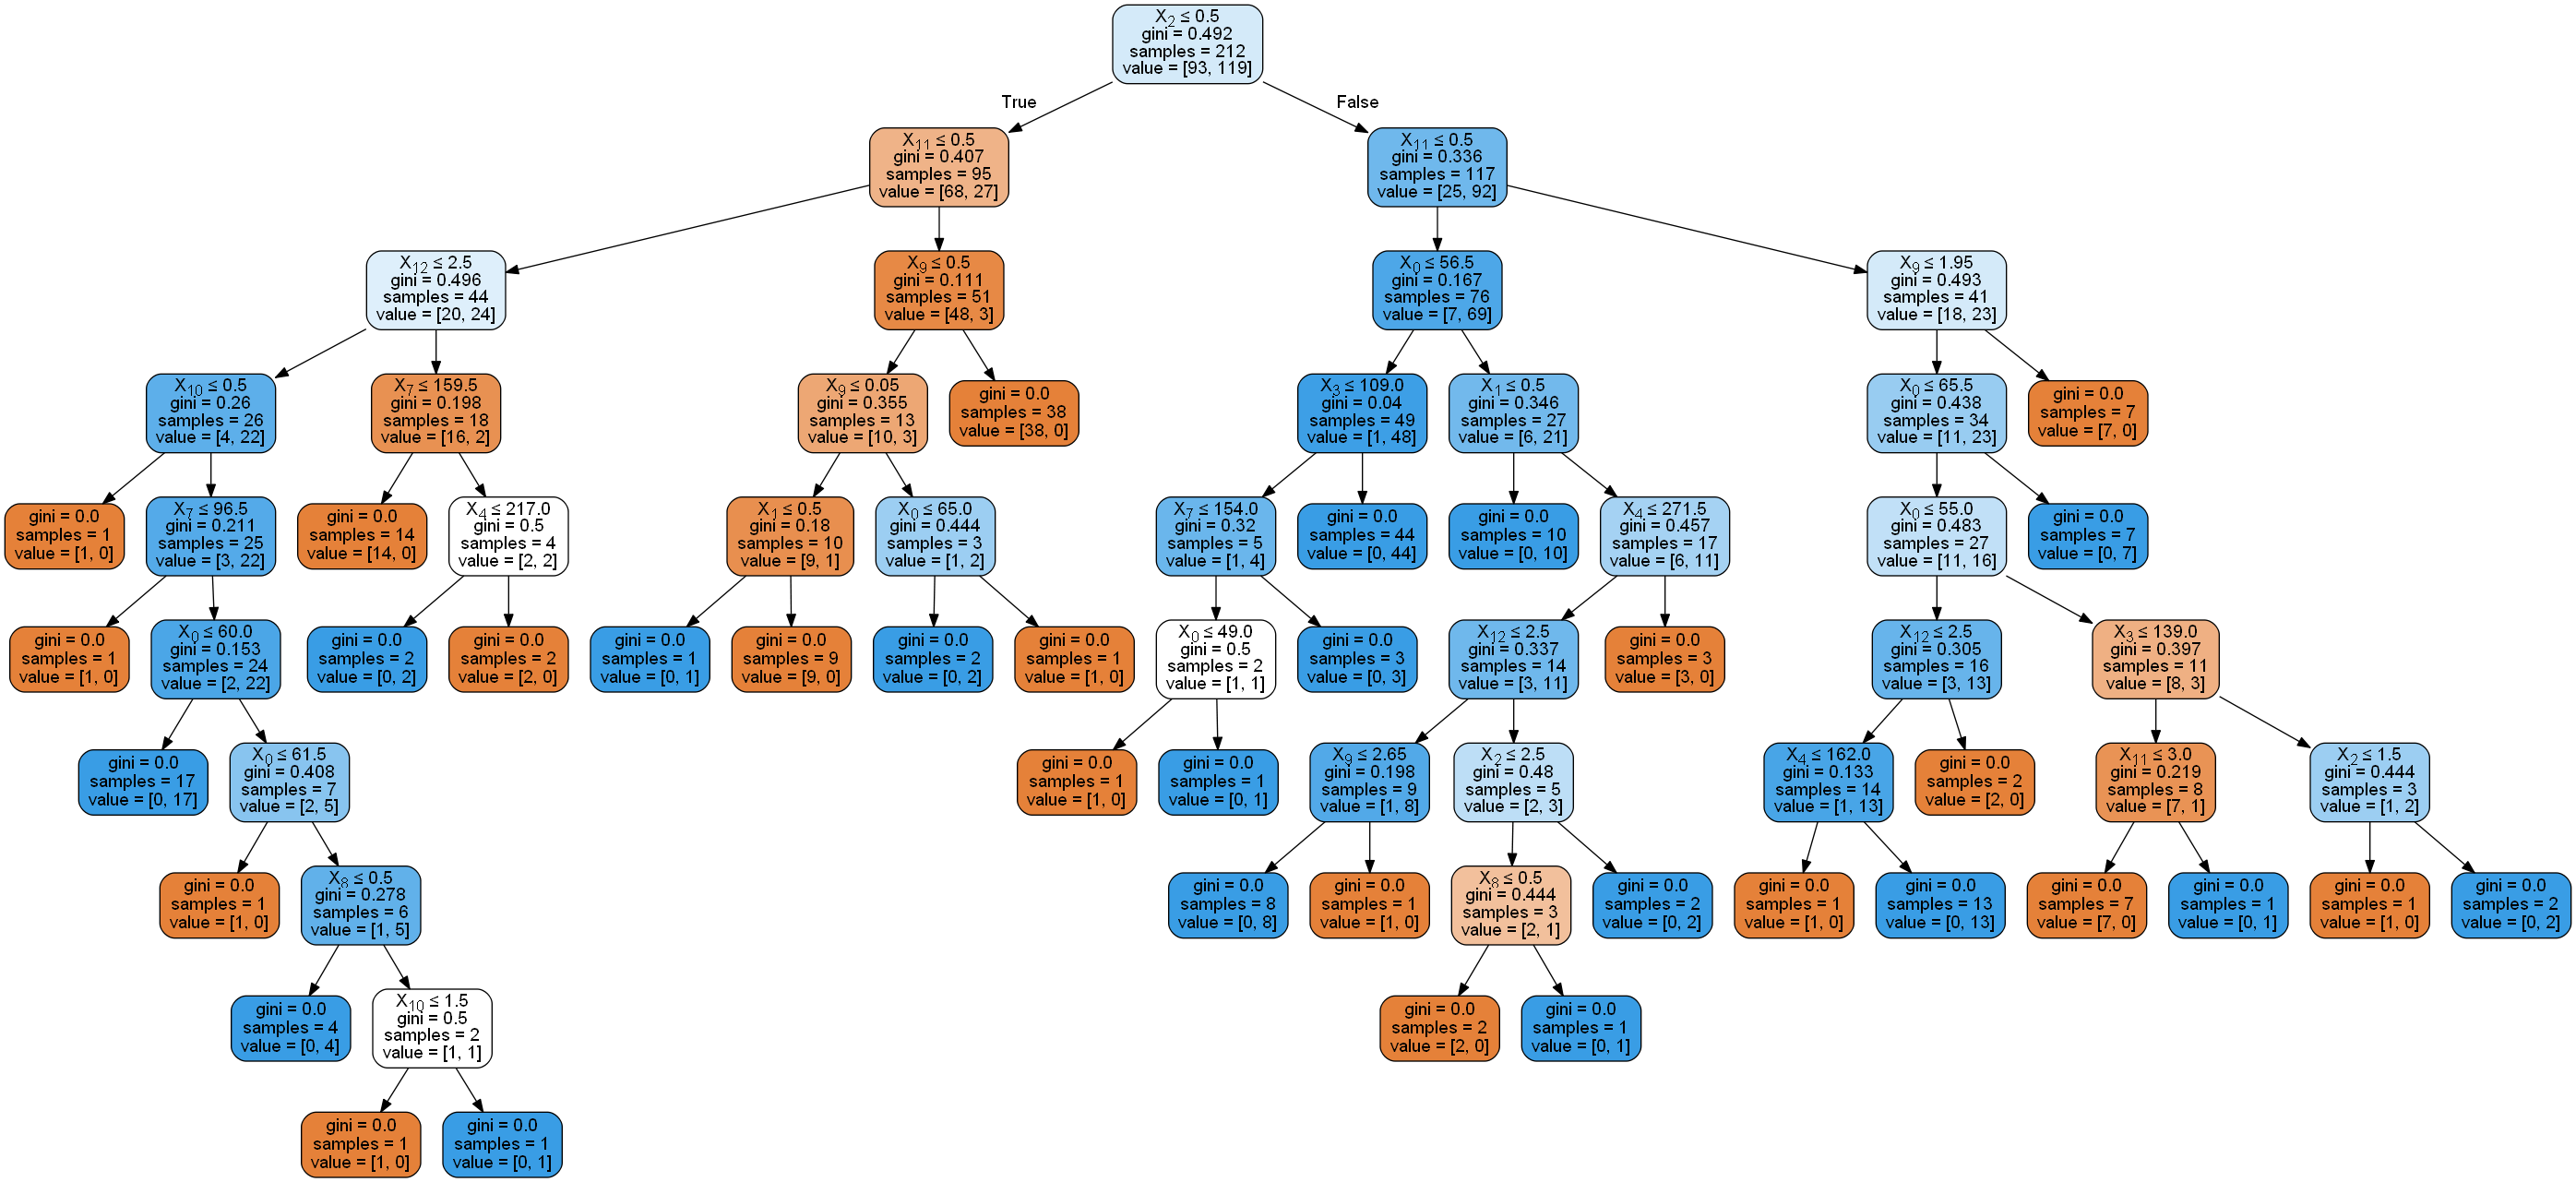

In [61]:
# plotting Tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

## Hyperparameter tuning

In [62]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [71]:
# Create function to generate model report for top 3 model.
def report(results,n_top=4):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank:{0}'.format(i))
            print('Mean Validation score:{0:.3f}(std:{1:.3f})'.format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [72]:
# specify parameters and distribution to sample from
param_dist={"max_depth":[3,None],
           "max_features":sp_randint(1,11),
           "min_samples_split":sp_randint(2,11),
            "criterion":["gini","entropy"]}

In [73]:
#run randomized search
n_iter_search=20
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [74]:
start=time()
random_search.fit(x_train,y_train)
print("Randomized search too %.2f seconds for %d candidates" "Paraneters settings."%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.54 seconds for 20 candidatesParaneters settings.
Model with rank:1
Mean Validation score:0.825(std:0.024)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 4}

Model with rank:2
Mean Validation score:0.807(std:0.045)
Parameters:{'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 9}

Model with rank:3
Mean Validation score:0.802(std:0.064)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 7}

Model with rank:4
Mean Validation score:0.793(std:0.084)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 3}

Model with rank:4
Mean Validation score:0.793(std:0.084)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 8}



In [75]:
#Use a full grid of mentioned parameters
param_grid={"max_depth":[3,None],
           "max_features":[1,3,10],
           "min_samples_split":[2,3,10],
            "criterion":['gini','entropy']}

In [76]:
# run grid search
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=5)

In [77]:
start=time()
grid_search.fit(x_train,y_train)
print("GridSearchCV too %.2f seconds for %d candidate parameter settings." %(time()-start,len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV too 0.90 seconds for 36 candidate parameter settings.
Model with rank:1
Mean Validation score:0.811(std:0.025)
Parameters:{'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank:2
Mean Validation score:0.802(std:0.064)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 2}

Model with rank:2
Mean Validation score:0.802(std:0.064)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 3}

Model with rank:2
Mean Validation score:0.802(std:0.064)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 10}



In [78]:
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 4}

In [163]:
dt_grid_search=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=10,min_samples_split=3)

Note :- Take the best parameters from 

In [164]:
dt_grid_search.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=10, min_samples_split=3)

In [165]:
y_pred_gs=dt_grid_search.predict(x_test)

In [166]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred_gs))

print('Precision',metrics.precision_score(y_test,y_pred_gs))

print('Recall',metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.8131868131868132
Precision 0.7735849056603774
Recall 0.8913043478260869
